In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error


import warnings
warnings.filterwarnings('ignore')

## Step 1: Loading data from file into Dataframe

In [75]:
housing_data = pd.read_csv('train.csv')
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 2: Perform EDA

In [76]:
housing_data.shape

(1460, 81)

1460 Row X 81 Columns

In [77]:
# Checking column types of dataset.
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [78]:
# Check number of columns for each data type.
housing_data.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

#### Observation
- The largest number of columns are of object type.
- The dataset does not have any column of type `Boolean`.

According to data dictionary, there are a few columns in dataset which have numeric values but they represent the categorical information.


Let's create list of names of such columns.

In [79]:
numerica_cat_cols = ['YearBuilt','YearRemodAdd', 'GarageYrBlt','YrSold','OverallQual', 
                     'OverallCond','MSSubClass','Fireplaces','GarageCars','MoSold',
                     'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                     'KitchenAbvGr', 'TotRmsAbvGrd']

### Let's take a glance at missing values in the dataset.

In [80]:
# Number of columns with missing values.
cols_with_missing_values = pd.DataFrame(housing_data.isnull().sum())[housing_data.isnull().sum()>0].sort_values(by=[0])

# Renaming column '0' to count
cols_with_missing_values.rename(columns={0: 'count'}, inplace=True)

# Adding new column percentage with ratio of missing value for each column.
cols_with_missing_values['percentage'] = cols_with_missing_values['count'].apply(lambda x: x / len(housing_data) * 100)

print(cols_with_missing_values)
print('Number of columns with missing values: {}'.format(len(cols_with_missing_values)))
print('Number of columns with number of missing values ratio > 5%: {}'.format(len(cols_with_missing_values[cols_with_missing_values['percentage'] > 5])))

              count  percentage
Electrical        1    0.068493
MasVnrArea        8    0.547945
BsmtQual         37    2.534247
BsmtCond         37    2.534247
BsmtFinType1     37    2.534247
BsmtExposure     38    2.602740
BsmtFinType2     38    2.602740
GarageCond       81    5.547945
GarageQual       81    5.547945
GarageFinish     81    5.547945
GarageYrBlt      81    5.547945
GarageType       81    5.547945
LotFrontage     259   17.739726
FireplaceQu     690   47.260274
MasVnrType      872   59.726027
Fence          1179   80.753425
Alley          1369   93.767123
MiscFeature    1406   96.301370
PoolQC         1453   99.520548
Number of columns with missing values: 19
Number of columns with number of missing values ratio > 5%: 12


#### Observations
- 19 out of 81 columns have missing values in them.
- 7 columns with missing value count > 100.
- 12 columns have more than 5% values missing in them.

### Anlyzing Numeric data from the dataset.

In [81]:
# Let's analyze columns with numeric data.

numeric_data = housing_data.select_dtypes(include=['int64', 'float64'])
numeric_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [82]:
numeric_data.shape

(1460, 38)

#### Let's deal with missing values in numeric columns.

In [83]:
# Let's checks missing values numeric columns.

pd.DataFrame(numeric_data.isnull().sum())[numeric_data.isnull().any()]

,0
LotFrontage,259
MasVnrArea,8
GarageYrBlt,81


#### Observation
- Columns LotFrontage, MasVnrArea, GarageYrBlt have missing values.
- Missing values of `LotFrontage` and `MasVnrArea` can be imputed with value 0.

In [84]:
housing_data['LotFrontage'].fillna(0, inplace=True)
housing_data['LotFrontage'].isnull().sum()

0

In [85]:
housing_data['MasVnrArea'].fillna(0, inplace=True)
housing_data['MasVnrArea'].isnull().sum()

0

Columns `YearBuilt`, `YearRemodAdd`, `GarageYrBlt` and `YrSold` have exact year as values. 

These columns can be converted to number of years by deducting them from the current year 2024.

In [86]:
year_cols = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

for col in year_cols:
    housing_data[col] = 2024 - housing_data[col]

#### Let's deal with outliers in numeric columns.

In [87]:
# Let's first remove columns with categorical values from numerica_data dataframe.

numeric_data = numeric_data.drop(numerica_cat_cols, axis=1)
numeric_data.shape

(1460, 21)

Number of columns reduced to 21 in numeric_data.

In [88]:
numeric_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0


### Let's find out outliers in the remaining numeric columns in numeric_data.

In [89]:
# Creating function of find outlier from dataframe using IQR method for the given column.

def find_outliers_using_iqr(df, col):
   q1 = df[col].quantile(0.25)
   q3 = df[col].quantile(0.75)
   iqr = q3-q1
   outliers = df[((df[col]<(q1-1.5*iqr)) | (df[col]>(q3+1.5*iqr)))]
   return outliers

In [90]:
# Find outlier values for each columns and store them in a different dataframe. 
num_cols = numeric_data.columns.tolist()

outliers_data = {
    'Column': [],
    'No Of Outliers': [],
    'Min Value': [],
    'Max Value': []
}
for colname in num_cols:
    outliers = find_outliers_using_iqr(numeric_data, colname)
    outliers_data['Column'].append(colname)
    outliers_data['No Of Outliers'] = len(outliers)
    outliers_data['Min Value'] = outliers.min()
    outliers_data['Max Value'] = outliers.max()

outliers_data_df =  pd.DataFrame(outliers_data)
outliers_data_df.head()

,Column,No Of Outliers,Min Value,Max Value
Id,Id,61,12.0,1438.0
LotFrontage,LotFrontage,61,42.0,174.0
LotArea,LotArea,61,5587.0,215245.0
MasVnrArea,MasVnrArea,61,0.0,1378.0
BsmtFinSF1,BsmtFinSF1,61,0.0,2188.0


In [91]:
# Lets see which columns have outliers in them.
outliers_data_df[outliers_data_df['No Of Outliers'] > 0]

,Column,No Of Outliers,Min Value,Max Value
Id,Id,61,12.0,1438.0
LotFrontage,LotFrontage,61,42.0,174.0
LotArea,LotArea,61,5587.0,215245.0
MasVnrArea,MasVnrArea,61,0.0,1378.0
BsmtFinSF1,BsmtFinSF1,61,0.0,2188.0
BsmtFinSF2,BsmtFinSF2,61,0.0,820.0
BsmtUnfSF,BsmtUnfSF,61,32.0,2336.0
TotalBsmtSF,TotalBsmtSF,61,728.0,3200.0
1stFlrSF,1stFlrSF,61,1136.0,3228.0
2ndFlrSF,2ndFlrSF,61,0.0,2065.0


#### Let's plot boxplot charts for each column in numeric_data.

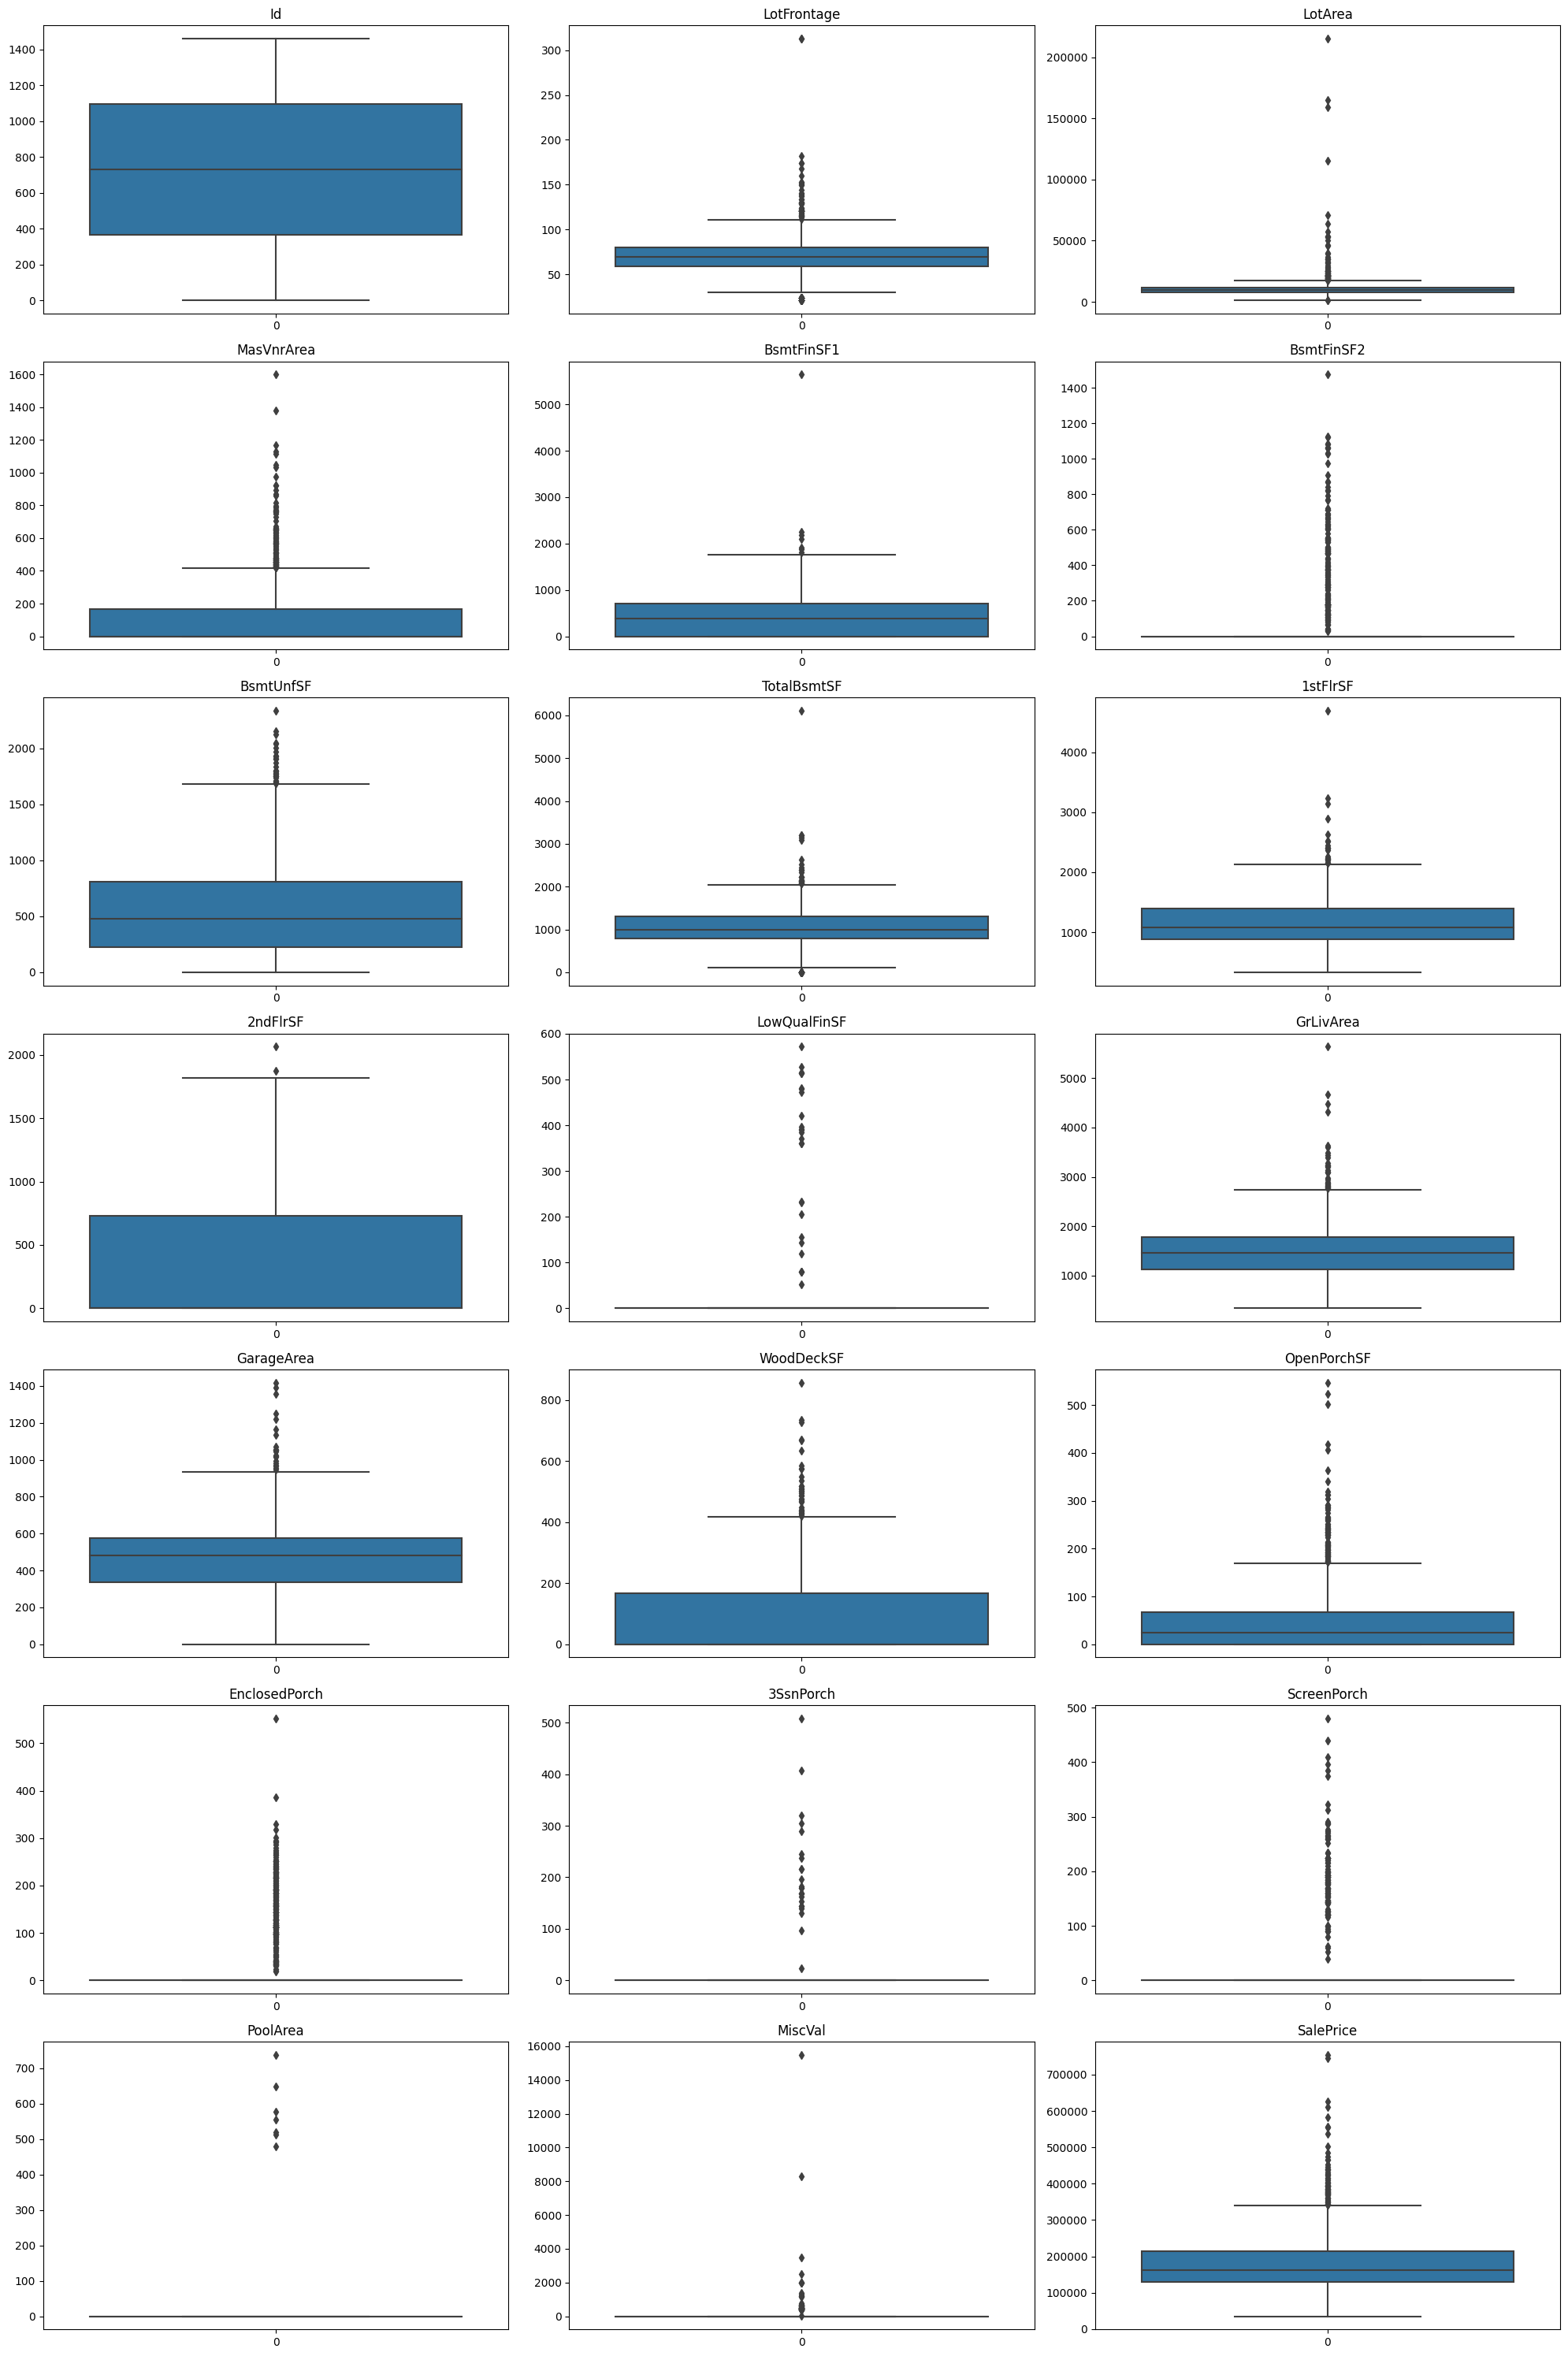

In [92]:
figure, axis = plt.subplots(nrows=7, ncols=3)
figure.set_size_inches(20, 30)
y = 0
for colname in num_cols:
    i, j = divmod(y, 3)
    sns.boxplot(numeric_data[colname], ax=axis[i, j]).set_title(colname)
    y = y + 1

plt.tight_layout()
plt.show()

### Observations
- Following columns have outliers which should be removed.
    - LotArea
    - MiscVal
    - MasVnrArea
    - SalePrice
    - PoolArea
    - ScreenPorch

Let's remove outliers from above columns.

In [93]:
# Creating function of filter rows which outlier values based on IQR method.

def remove_outliers_using_iqr(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    return df[~((df[col]<(q1-1.5*iqr)) | (df[col]>(q3+1.5*iqr)))]

In [94]:
# Removing outlier values for following columns from the original dataset.
outlier_cols = ['LotArea', 'MiscVal','MasVnrArea','SalePrice','PoolArea','ScreenPorch']

for colname in outlier_cols:
    housing_data = remove_outliers_using_iqr(housing_data, colname)

housing_data.shape

(1120, 81)

With removal of outliers, number of rows are reduced to 1120 in the dataset.

### Anlyzing object type data from the dataset.

In [95]:
# Storing data of object columns in a separate dataset.

object_data = housing_data.select_dtypes(include=['object'])
object_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [96]:
object_data.shape

(1120, 43)

#### Let's deal with missing values in object type columns

In [97]:
# Lets check missing values.

# Creating separate datafarme with column names and number of missing values in them.
missing_object_data = pd.DataFrame(object_data.isnull().sum()).loc[object_data.isnull().any()]
missing_object_data.rename(columns={0: 'missing_counts'}, inplace=True)

# Adding a new column for percentage ratio of missing values in each column.
missing_object_data['percentage'] = missing_object_data['missing_counts'] / len(object_data) * 100

# Sorting descending order of missing value ratio.
missing_object_data.sort_values(by='percentage', ascending=False, inplace=True)
missing_object_data

,missing_counts,percentage
PoolQC,1120,100.000000
MiscFeature,1118,99.821429
Alley,1039,92.767857
Fence,899,80.267857
MasVnrType,724,64.642857
FireplaceQu,615,54.910714
GarageType,77,6.875000
GarageFinish,77,6.875000
GarageQual,77,6.875000
GarageCond,77,6.875000


#### Observations
- `PoolQC`, `MiscFeature`, `Alley`, `Fence` and `MasVnrType` columns have very high ratio of missing values.
- `PoolQC` has 100% missing values, hence this column can be dropped from the dataset.
- `MiscFeature` has near 100% missinv values. Also it does not have much significance on the target feature. It can be dropped too. 
- For the purpose of this assignment, we can impute the missing values.
- According to data dictionary missing values in following columns can be imputed with value 'NA'.
    - PoolQC
    - Alley
    - Fence
    - FireplaceQu
    - GarageType
    - GarageFinish
    - GarageQual
    - GarageCond
    - BsmtFinType2
    - BsmtExposure
    - BsmtFinType1
    - BsmtCond
    - BsmtQual
- Following columns be imputed with value 'None'
    - MasVnrType

In [98]:
# Let's drop PoolQC and MiscFeature from the dataset.
drop_cols = ['PoolQC', 'MiscFeature']

housing_data = housing_data.drop(drop_cols, axis=1)

In [99]:
# Let's fill value NA and None as explained above.

# Imputing values for object columns.
cols = ['Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']

housing_data[cols] = housing_data[cols].fillna('NA')

housing_data['MasVnrType'].fillna('None', inplace=True)

housing_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 79, dtype: int64

In [100]:
# Let's check missing values in the dataset again.

pd.DataFrame(housing_data.isnull().sum()).loc[housing_data.isnull().any()]

,0
Electrical,1
GarageYrBlt,77


#### Observation
- Now only 3 columns now have missing values in the dataset.
- `Electrical` and `GarageYrBlt` have a very low number of missing values. We can leave them as they are for now.

There are some columns in the datase which has numeric values but they represent cagorical data.

We need to convert them to object type so that we can convert them to binary values or create dummies for them.

In [101]:
num_cat_cols = ['MSSubClass', 'OverallQual','OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']

for colname in num_cat_cols:
    housing_data[colname]= housing_data[colname].astype('object')

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1120 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1120 non-null   int64  
 1   MSSubClass     1120 non-null   object 
 2   MSZoning       1120 non-null   object 
 3   LotFrontage    1120 non-null   float64
 4   LotArea        1120 non-null   int64  
 5   Street         1120 non-null   object 
 6   Alley          1120 non-null   object 
 7   LotShape       1120 non-null   object 
 8   LandContour    1120 non-null   object 
 9   Utilities      1120 non-null   object 
 10  LotConfig      1120 non-null   object 
 11  LandSlope      1120 non-null   object 
 12  Neighborhood   1120 non-null   object 
 13  Condition1     1120 non-null   object 
 14  Condition2     1120 non-null   object 
 15  BldgType       1120 non-null   object 
 16  HouseStyle     1120 non-null   object 
 17  OverallQual    1120 non-null   object 
 18  OverallCond  

#### Let's store the original dataset to a different variable before making any more changes to it.

In [102]:
housing_primary_df = housing_data

#### Let's get column names which has exactly two unique values in the dataset.

In [103]:
# Let's check if there are any column with only two unique values.
binary_val_cols = []

for colname in housing_data.columns:
    l = len(housing_data[colname].value_counts())
    if l == 2:
        binary_val_cols.append(colname)
binary_val_cols

['Street', 'CentralAir']

In [104]:
housing_data['Utilities'].value_counts()

Utilities
AllPub    1120
Name: count, dtype: int64

In [105]:
# Creating function to map binary column values to 0 and 1.

col_value_map = {
    'Street': {'Pave': 0, 'Grvl': 1},
    'CentralAir': {'Y': 1, 'N': 0}
}

def map_values(col):
    return col.map(col_value_map.get(col.name))

In [106]:
for colname in binary_val_cols:
    housing_data[[colname]] = housing_data[[colname]].apply(map_values)
    print(housing_data[[colname]].value_counts())

Street
0         1118
1            2
Name: count, dtype: int64
CentralAir
1             1035
0               85
Name: count, dtype: int64


#### Let's create dummy variables for categorical columns.

In [107]:
# Derive a separate dataframe with only categorical columns from the original dataframe.

categorical_data = housing_data.select_dtypes(include=['object'])
categorical_data.shape

(1120, 51)

In [108]:
# Create dummies.

dummies = pd.get_dummies(categorical_data, drop_first=True, dtype=np.int64)
dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [109]:
# Dropping the real categorical columns from the dataset.
housing_data = housing_data.drop(list(categorical_data.columns), axis=1)

In [110]:
# Merging with the dummies dataset.

housing_data = pd.concat([housing_data, dummies], axis = 1)
housing_data.shape

(1120, 298)

In [111]:
# Let's drop Id column, as it does not add any value to the analysis.
housing_data = housing_data.drop(['Id'], axis=1)

## Step 3: Split dataset into train and test set.

In [116]:
np.random.seed(0)

train_data, test_data = train_test_split(housing_data, test_size=0.3, train_size=0.7, random_state=100)

In [117]:
print(train_data.shape)
print(test_data.shape)

(784, 297)
(336, 297)


In [118]:
X_train = train_data.drop(['SalePrice'], axis=1)
y_train = train_data['SalePrice']

#### Scaling train dataset.

In [119]:

train_data_numeric =  X_train.select_dtypes(include=['int64', 'float64'])
train_data_numeric.head()

,LotFrontage,LotArea,Street,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
672,0.0,11250,0,47,47,0.0,767,0,441,1208,...,0,0,0,0,1,0,0,0,1,0
381,60.0,7200,0,18,18,0.0,0,0,1293,1293,...,0,0,1,0,0,0,0,0,0,1
846,75.0,9317,0,31,31,137.0,513,0,227,740,...,0,0,0,0,1,0,0,0,1,0
298,90.0,11700,0,56,56,365.0,384,175,143,702,...,0,0,0,0,1,0,0,0,1,0
345,65.0,6435,0,85,74,0.0,0,0,972,972,...,0,0,0,0,1,0,0,0,1,0


Let's use MinMaxScaler for scaling numeric features in the dataset.

In [120]:
# Re-scaling numeric columns in train dataset using MinMaxScaler.
scaler = MinMaxScaler()
num_cols = train_data_numeric.columns.tolist()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()


,LotFrontage,LotArea,Street,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
672,0.000000,0.602292,0.0,0.233577,0.550000,0.000000,0.477584,0.000000,0.240196,0.376794,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
381,0.329670,0.351440,0.0,0.021898,0.066667,0.000000,0.000000,0.000000,0.704248,0.403306,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
846,0.412088,0.482564,0.0,0.116788,0.283333,0.330120,0.319427,0.000000,0.123638,0.230817,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
298,0.494505,0.630164,0.0,0.299270,0.700000,0.879518,0.239103,0.118725,0.077887,0.218964,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
345,0.357143,0.304057,0.0,0.510949,1.000000,0.000000,0.000000,0.000000,0.529412,0.303182,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [121]:
# Filling missing values in training dataset with interpolated values.

X_train = X_train.fillna(X_train.interpolate())

In [122]:
y_train = np.log(y_train)
y_train.head()

672    12.013701
381    12.142867
846    12.269047
298    12.072541
345    11.850825
Name: SalePrice, dtype: float64

## Step 4: Build Models

### Step 41.: Build Ridge Model.

In [123]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

In [124]:
ridge_model = Ridge()

folds = 5

ridge_cv = GridSearchCV(estimator=ridge_model, 
                        param_grid=params,
                        cv=folds, 
                        scoring='neg_root_mean_squared_error',
                        return_train_score=True,
                        verbose=1)

ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [125]:
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 3.0}
-0.12219628189439


In [126]:
ridge_cv_results = pd.DataFrame(ridge_cv.cv_results_)
ridge_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.383661,0.043229,0.023651,0.007993,0.0001,{'alpha': 0.0001},-0.154418,-0.138893,-0.171121,-0.195987,...,-0.158668,0.022890,23,-0.067638,-0.068677,-0.066459,-0.069462,-0.069169,-0.068281,0.001102
1,0.480308,0.048401,0.028885,0.017042,0.001,{'alpha': 0.001},-0.154064,-0.138146,-0.170087,-0.194660,...,-0.157908,0.022564,22,-0.067639,-0.068680,-0.066460,-0.069463,-0.069170,-0.068283,0.001102
2,0.438950,0.027943,0.023506,0.011504,0.01,{'alpha': 0.01},-0.151481,-0.133732,-0.161615,-0.183529,...,-0.152278,0.019286,21,-0.067700,-0.068809,-0.066554,-0.069521,-0.069222,-0.068361,0.001095
3,0.415665,0.020311,0.031628,0.021965,0.05,{'alpha': 0.05},-0.146010,-0.126924,-0.143517,-0.158740,...,-0.141061,0.011513,20,-0.068213,-0.069666,-0.067377,-0.070167,-0.069561,-0.068997,0.001037
4,0.413991,0.013063,0.030413,0.007002,0.1,{'alpha': 0.1},-0.142847,-0.123300,-0.134654,-0.147340,...,-0.135558,0.008694,19,-0.068852,-0.070605,-0.068398,-0.071013,-0.070012,-0.069776,0.001002
5,0.438390,0.023107,0.034448,0.005908,0.2,{'alpha': 0.2},-0.139363,-0.119795,-0.127762,-0.139233,...,-0.130928,0.007484,18,-0.069913,-0.072080,-0.070001,-0.072358,-0.070873,-0.071045,0.001019
6,0.391254,0.024449,0.021156,0.007071,0.3,{'alpha': 0.3},-0.137166,-0.117945,-0.124965,-0.136189,...,-0.128722,0.007200,17,-0.070788,-0.073230,-0.071198,-0.073384,-0.071653,-0.072051,0.001063
7,0.437259,0.058627,0.028287,0.021677,0.4,{'alpha': 0.4},-0.135560,-0.116734,-0.123462,-0.134678,...,-0.127355,0.007070,16,-0.071550,-0.074182,-0.072155,-0.074220,-0.072360,-0.072893,0.001100
8,0.483907,0.073125,0.026001,0.009920,0.5,{'alpha': 0.5},-0.134314,-0.115849,-0.122514,-0.133823,...,-0.126394,0.007000,15,-0.072234,-0.075002,-0.072959,-0.074930,-0.073006,-0.073626,0.001128
9,0.432703,0.048916,0.027088,0.003583,0.6,{'alpha': 0.6},-0.133314,-0.115161,-0.121851,-0.133305,...,-0.125669,0.006967,14,-0.072858,-0.075728,-0.073659,-0.075553,-0.073603,-0.074280,0.001148


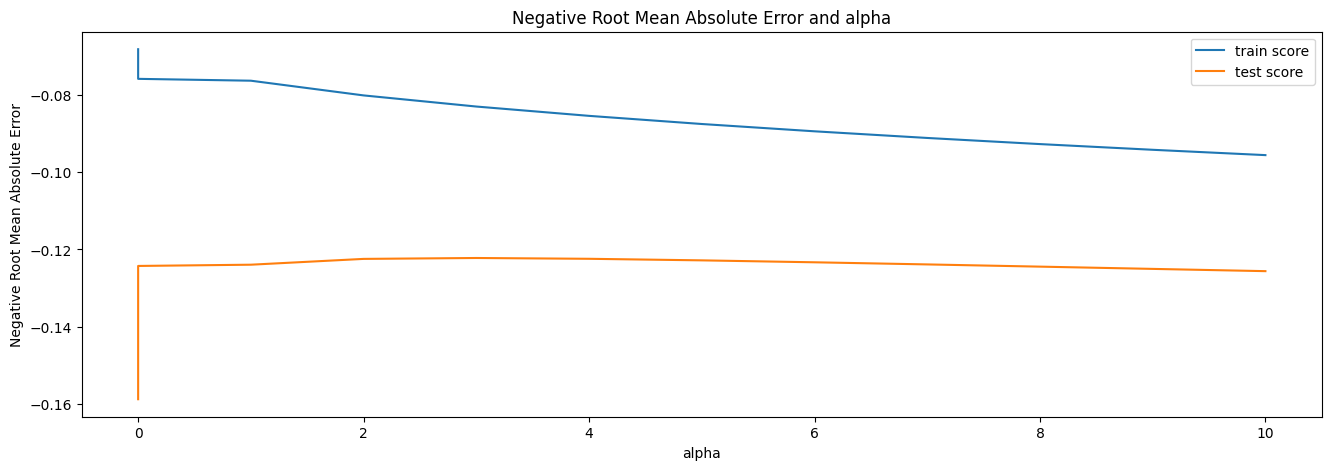

In [127]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Root Mean Absolute Error')
plt.title("Negative Root Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [128]:
alpha = 3.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.11803839e-02,  1.09424728e-01,  1.49660264e-02, -1.24361975e-01,
       -8.20178159e-02, -4.02331441e-04,  1.42076482e-01,  8.30735219e-02,
        5.40348827e-02,  1.40309808e-01,  7.14254206e-02,  2.08461429e-01,
        1.25508766e-01,  1.07443270e-02,  2.66903788e-01, -1.59225877e-02,
        1.08931025e-01,  5.60293777e-02,  1.60218107e-02, -3.49092460e-03,
        5.15799197e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.87185296e-02,  1.75035065e-02, -3.74325090e-02, -6.32496541e-03,
        3.20485744e-02, -1.62376510e-03, -2.53285329e-02,  4.20309539e-02,
        4.20365878e-02, -3.57827164e-02,  2.12137532e-03,  1.21816502e-03,
        4.12973242e-02, -7.67448841e-02,  1.28800260e-02, -4.96047302e-04,
        7.56880564e-02,  8.99040781e-02,  8.42949880e-02,  5.82847304e-02,
       -1.95139210e-02,  3.49864992e-02,  2.36437689e-02,  4.65400759e-03,
        5.86797794e-03,  2.30766213e-02, -5.89540124e-02,  3.74079117e-03,
        5.45062275e-03, -

In [129]:
y_train_pred = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.9363736013638077
